In [168]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt
from random import sample 

img = "https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/modelisation/7_nlp/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))

# Option d'affchage
pd.set_option('display.max_columns', None)

In [169]:
# Importation de la base nettoyée

df0 = pd.read_csv('data/data_cleaned.csv', sep = ',', encoding='latin-1')

In [170]:
df = df0[[
        'Orateur', 'Unnamed: 0', 'Sujet.débattu', 'Réplique', 
        'Didascalie', 'commissions', 'Groupe', 'tokenized_replique', 
        'stemmed_replique', 'tokenized_didascalie', 'stemmed_didascalie'
        ]]

df = df.rename(columns = {
                            'Unnamed: 0': 'index'
                         }
              )

### Fréquence relative des novices en nombre d’intervention et nombre de mots total

In [171]:
nb_nov = df[df['Groupe'] == 'Novice'].drop_duplicates(subset = ['Orateur'], keep = 'first').shape[0]
nb_intervention_nov  = df[df['Groupe'] == 'Novice'].shape[0]
score_nov = int(10 * nb_intervention_nov / nb_nov) / 10 

nb_exp = df[df['Groupe'] == 'Exp'].drop_duplicates(subset = ['Orateur'], keep = 'first').shape[0]
nb_intervention_exp  = df[df['Groupe'] == 'Exp'].shape[0]
score_exp = int(10 * nb_intervention_exp / nb_exp) / 10

ratio = int(10 * score_exp / score_nov) / 10

In [172]:
print('Nombre moyen de réplique par intervenant pour un Novice: ' + str(score_nov))
print('Nombre moyen de réplique par intervenant pour un Non-Novice: ' + str(score_exp))

print('Ratio : ', ratio)

Nombre moyen de réplique par intervenant pour un Novice: 460.8
Nombre moyen de réplique par intervenant pour un Non-Novice: 1021.8
Ratio :  2.2


Les non-novices parlent clairement plus que les novices : plus de 2 fois plus

#### Construction de la variable du nombre d'intervention par orateur

In [173]:
orateurs = list(set(df['Orateur']))
comptes = []

for orateur in orateurs:
    nombre_intervention = df[df['Orateur'] == orateur].shape[0]
    comptes.append((orateur, nombre_intervention))

comptes = dict(comptes)

In [174]:
df['nb_interventions'] = df.apply(lambda row: comptes[row.Orateur], axis = 1)

#### Répartition du nombre d'interventions au sein de chaque groupe

Pour les novices : 

In [175]:
px.histogram(df[df['Groupe'] == 'Novice'].drop_duplicates(subset = ['Orateur'], keep = 'first').sort_values(by = 'nb_interventions'), x = 'Orateur', y = 'nb_interventions')

Pour les non-novices : 

In [176]:
px.histogram(df[df['Groupe'] == 'Exp'].drop_duplicates(subset = ['Orateur'], keep = 'first').sort_values(by = 'nb_interventions'), x = 'Orateur', y = 'nb_interventions')

On note qu'il y a deux orateurs non-novices (R. Ferrand et F. De Rugy) qui dominent très largement le nombre d'intervention dans leur groupe. Ches les novices, il n'y a pas de telle domination.

#### Construction de la variable du nombre de mot par intervention

In [177]:
df['nb_mots'] = df.apply(lambda row: len(row.Réplique.split(' ')), axis = 1)

In [178]:
nb_mot_nov = df[df['Groupe'] == 'Novice'][['nb_mots']].sum()
score_nov = int(10 * nb_mot_nov / nb_intervention_nov) / 10 

nb_mot_exp = df[df['Groupe'] == 'Exp'][['nb_mots']].sum()
score_exp = int(10 * nb_mot_exp / nb_intervention_exp) / 10 

ratio = int(10 * score_exp / score_nov) / 10

In [179]:
print('Nombre moyen de mots par intervention pour un Novice: ' + str(score_nov))
print('Nombre moyen de mots par intervention pour un Non-Novice: ' + str(score_exp))

print('Ratio : ', ratio)

Nombre moyen de mots par intervention pour un Novice: 51.5
Nombre moyen de mots par intervention pour un Non-Novice: 46.0
Ratio :  0.8


On remarque que les interventions des novices et non-novices sont à peu près de la même longueur (légèrement plus long pour les novices).

### Analyse des didascalies

On créé pour chaque réplique les variables binaires suivantes :  
    -présence de didascalies  
    -présence de didascalies positives (applaudissement, exclamation)  
    -présence de didascalies négative 

In [192]:
# On définit d'abord les mots qui caractérisent une didascalie positive ou negative

positive_words = ['applaud', 'oui']

negative_words = ['exclam', 'protest', 'quitt', 'murmur']

def positivite_didascalie(stemmed_didascalie):
    text = str(stemmed_didascalie).split(' ')
    
    if len(text) == 0:
        return 0
    
    for word in positive_words:
        if word in text:
            return 1
    
    for word in negative_words:
        if word in text:
            return -1
        
    return 0
    

In [ ]:
df['presence_didascalie'] = df.apply(lambda row: str(row.stemmed_didascalie) != 'nan', axis = 1)

df['didascalie_positive'] = df.apply(lambda row: int(positivite_didascalie(row.stemmed_didascalie) == 1), axis = 1)
df['didascalie_negative'] = df.apply(lambda row: int(positivite_didascalie(row.stemmed_didascalie) == -1), axis = 1)

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'protest', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'agir', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['protest', 'continu', 'claqu', 'pupitr', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'agir', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['tres', 'bien', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
[

['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'ains', 'quelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'modem', 'quelqu', 'banc', 'group', 'lr']
['nan']
['exclam', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['applaud', 'sourir', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['mme', 'elsa', 'faucillon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'f

['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'erwan', 'balan', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applau

['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['mme', 'agnes', 'thill', 'sexclam', 'mme', 'emmanuel', 'ménard', 'xavi', 'breton', 'sexcl']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['app

['applaud', 'banc', 'group', 'lc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'mme', 'jeanin', 'dubi', 'brigitt', 'kust', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'quelqu', 'banc', 'group', 'larem', 'jean', 'lou', 'bourlang', 'applaud', 'égal']
['nan']
['nan']
['mme', 'coral', 'dubost', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'udi', 'agir', 'indépend', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mjid', 'el', 'guerrab', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem', 'soc', 'laiss', 'parl', 'plusieur', 'banc', 'group', 'lr', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['marc', 'fur', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['président', 'coup', 'micro', 'loratric', 'a', 'dépass', 'temp', 'parol']
['nan']
['nan']
['nan']
['nan']
['nan']
['ap

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'ains', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'nadi', 'hai', 'sexclam']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'mme', 'carolin', 'fiat', 'mme', 'moniqu', 'iborr', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['protest', 'quelqu', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'soc', 'ains', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'jérôm', 'lambert', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carol', 'grandjean', 'herv', 'bervill', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'mm', 'françois', 'jolivet', 'pierr', 'alain', 'raphan', 'applaud', 'égal']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['exclam', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'ains', 'quelqu', 'banc', 'group', 'modem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['a

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'rir', 'banc', 'group', 'soc', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['sourir']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem', 'mêm', 'mouv']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['exclam', 'mêm', 'banc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['bravo', 'applaud', 'banc', 'group', 'applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['éric', 'pauget', 'applaud']
['applaud', 'surquelqu', 'banc', 'group', 'larem', 'ains', 'banc', 'group', 'fi', 'gdr', 'parm', 'déput', 'non', 'inscrit', 'plusieur', 'déput', 'group', 'lr', 'lèvent', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'applaud', 'banc', 'group'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['exclam', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'ains', 'plusieur', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'luc', 'mélenchon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['éric', 'coquerel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'emmanuel', 'ménard', 'applaud']
['nan']
['nan']
['nan']
['nouvel', 'protest', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'mme', 'sylvi', 'pinel', 'applaud', 'égal']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'banc', 'group', 'fi', 'lr', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['si', 'quelqu', 'banc', 'group', 'exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['vif', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['sourir', 'plusieur', 'banc']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['vif', 'applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['sourir', 'applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['rir', 'applaud', 'banc', 'group', 'lr', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'ng', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'lassall', 'applaud']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi', 'lt', 'ains', 'quelqu', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ng', 'larem', 'modem', 'udi', 'agir']
['applaud', 'bancsd', 'group', 'gdr', 'udi', 'agir', 'ains', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['sourir', 'exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'mme', 'georg', 'pau', 'langevin', 'applaud', 'égal']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ng', 'plusieur', 'banc', 'group', 'lc', 'lr']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'quelqu', 'banc', 'group', 'soc']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi', 'udi', 'agir', 'plusieur', 'banc', 'group', 'larem', 'vincent', 'bru', 'applaud', 'égal']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'etsur', 'quelqu', 'banc', 'group', 'larem', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'quelqu', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'mme', 'gisel', 'biémouret', 'applaud', 'égal']
[

['nan']
['nan']
['mm', 'dupont', 'aign', 'lassall', 'applaud', 'applaud', 'banc', 'group', 'gdr', 'fi', 'soc', 'reitz', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'surquelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'jean', 'luc', 'mélenchon', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'ains', 'quelqu', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'nombreux', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['applaud', 'plusieur', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'g

['nan']
['applaud', 'banc', 'group', 'udi', 'i', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'quelqu', 'banc', 'group', 'udi', 'agir', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'quelqu', 'banc', 'group', 'modem']
['applaud', 'nombreux', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'lèvent', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['protest', 'banc', 'group', 'lr', 'soc', 'fi', 'applaud', 'plusieur', 'banc', 'group', 'larem']
['ah', 'bon', 'banc', 'group', 'soc']
['nan']
['exclam', 'persist']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['mme', 'cécil', 'muschott', 'applaud', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['sourir', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['exclam', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'soc']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mm', 'jean', 'charl', 'col', 'roy', 'jean', 'marc', 'zules', 'applaud']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc', 'plusieur', 'déput', 'group

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'agnes', 'thill', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'fi', 'mme', 'emmanuel', 'ménard', 'mme', 'mar', 'franc', 'lorho', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['xavi', 'breton', 'patrick', 'hetzel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'lassall', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['eh', 'oui', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['rir', 'parm', 'déput', 'non', 'inscrit']
['appla

['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['président', 'commiss', 'affair', 'économ', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', '

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['cest', 'faux', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['fabien', 'di', 'filippo', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['gill', 'lurton', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['patric', 'vercher', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'modem', 'ains', 'quelqu', 'banc', 'group', 'larem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'soph', 'aucon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc', 'bravo', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr', 'gdr', 'fi', 'quelqu', 'banc', 'group', 'ngains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['oh', 'là', 'là', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'udi', 'agir']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'udi', 'agir', 'fi', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'ng', 'fi', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ilet', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'fi', 'gdr', 'ains', 'plusieur', 'banc', 'group', 'lr', 'lt']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'mme', 'soph', 'met', 'applaud', 'égal']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['mme', 'mar', 'noëll', 'battistel', 'applaud']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'véron', 'riotton', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'lc', 'ains', 'quelqu', 'banc', 'group', 'gdr', 'fi']
['applaud', 'quelqu', 'banc', 'g

['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'mme', 'elsa', 'faucillon', 'applaud', 'égal']
['murmur', 'diver', 'banc']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ugo', 'bernalic', 'applaud']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'surl', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 

['nan']
['jean', 'luc', 'mélenchon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'fi', 'gdr', 'modem', 'ains', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'fi', 'larem', 'soc']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'fi', 'gdr']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'uai', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'ains', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'udi', 'agir', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'udi', 'agir', 'franc', 'chouat', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'i', 'modem', 'ains', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['app

['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'gdr']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['applaud', 'surl', 'banc', 'group', 'larem', 'modem']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'surplusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['p

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'luc', 'mélenchon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['jimmy', 'pahun', 'applaud']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['tres', 'bien', 'banc', 'group', 'lr']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'véron', 'rioton', 'applaud', 'protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['exclam', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['non', 'plusieur', 'banc', 'group', 'lr']
['nan']


['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['mme', 'bénédict', 'peyrol', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'lr', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mm', 'jean', 'charl', 'col', 'roy', 'bruno', 'millien', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'larem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['jimmy', 'pahun', 'mme', 'catherin', 'fabr', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['exclam', 'quelqu', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bravo', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'delphin', 'batho', 'jimmy', 'pahun', 'applaud']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'larem', 'modem']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'vincent', 'bru', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'applaud', 'plusieur', 'banc', 'group', 'lar

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'fi', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['rir', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'nicol', 'dupont', 'aignan', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ex

['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['oh', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'gdr', 'lt']
['applaud', 'banc', 'group', 'soc', 'gdr', 'mme', 'jeanin', 'dubi', 'applaud', 'égal']
['applaud', 'banc', 'group', 'soc', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'députess', 'lèvent', 'applaud', 'lon

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'plusieur', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'soc', 'gdr']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'soc', 'gdr', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['exclam', 'banc', 'group', 'lr', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem', 'ains', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'fi', 'gdr']
['nan']
['jean', 'françois', 'eliaou', 'mme', 'olivi', 'grégoir', 'applaud']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'rem', 'uai', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'modem']
['applaud', 'banc', 'group', 'lr', 'lc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bor', 'vallaud', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'exclam']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['applaud', 'parmil', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['nan']
['mouv', 'diver']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'certain', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'christian', 'jacob', 'sexclam', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['mm', 'didi', 'martin', 'nicol', 'turquois', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'soph', 'aucon', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem', 'larem', 'udi', 'agir']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'murmur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'ains', 'quelqu

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['éric', 'coquerel', 'protest', 'applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'exclam', 'banc', 'group', 'lr', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bruno', 'millien', 'désign', 'banc', 'gauch']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['alor', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['oh', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lare

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'fi']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['sourir']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['exclam', 'plusieur', 'banc', 'group', 'lr', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['non', 'cest', 'vrai', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi', 'gdr']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['rumeur', 'banc', 'group', 'lr', 'fi', 'gdr', 'applaud', 'nombreux', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['app

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['eh', 'oui', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['maxim', 'minot', 'applaud', 'applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['ugo', 'bernalic', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'applaud', 'nombreux', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'fi']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sébastien', 'jumel', 'maxim', 'minot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['applaud', 'quelqu', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mathild', 'panot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bastien', 'lachaud', 'applaud']
['applaud', 'banc', 'group', 'fi', 'jean', 'paul', 'dufregn', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'sourir', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'fi']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['vif', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'b

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'gdr', 'ains', 'plusieur', 'banc', 'group', 'larem', 'modem', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['appl

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['serg', 'letchimy', 'applaud', 'applaud', 'banc', 'group', 'ng', 'ains', 'nombreux', 'banc', 'group', 'larem', 'modem', 'udi', 'agir', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['tres', 'bien', 'plusieur', 'banc', 'group', 'lc', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'ng']
['nan']
['applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'quelqu', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv

['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'soc', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'brouhah']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'joël', 'giraud', 'rapporteur', 'général', 'commiss', 'financ', 'léconom', 'général', 'contrôl', 'budgétair', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lare

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'plusieur', 'banc', 'group', 'lr', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'lt', 'ains', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'lr', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'lc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['sourir']
['françois', 'cornut', 'gentill', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lc', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['so

['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['mme', 'valer', 'rabault', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'exclam', 'banc', 'group', 'larem', 'lr', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'udi', 'agir', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['mme', 'sylvi', 'pinel', 'applaud']
['nan']
['sourir', 'applaud', 'banc', 'group', 'lt', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'ban

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'lr', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaudissementssur', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['app

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['gill', 'lurton', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['hutin', 'sadress', 'garçon', 'assis', 'tribun', 'public', 'hakaro', 'vall']
['nan']
['nan']
['nan']
['nan']
['nan']
['bruno', 'joncour', 'mme', 'mariel', 'sarn', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'udi', 'agir', 'mme', 'constanc', 'grip', 'applaud', 'égal']
['applaud', 'quelqu', 'banc', 'group', 'soc', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['ah', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['protest', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'gdr']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'parm', 'déput', 'non', 'inscrit']
['mêm', 'mouv', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ains', 'quelqu', 'banc', 'group', 'lc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'rem', 'modem', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['ah', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'lret', 'lc', 'ains

['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['eh', 'oui', 'plusieur', 'banc', 'group', 'lr', 'eh', 'oui', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'bravo', 'banc', 'group', 'lr']
['applaud', 'quelqu', 'banc', 'group', 'lr', 'adrien', 'quatennen', 'applaud', 'égal']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'i', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'fi']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'lc']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['viv', 'protest', 'banc', 'group', 'rem', 'banc', 'group', 'lr', 'protest', 'hu', 'banc', 'group', 'rem', 'applaud', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'rem', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['tumult', 'continu']
['nan']
['sourir', 'applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'modem', 'ains', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['eh', 'oui', 'applaud', 'banc', 'group', 'lr']
['nan']
['assumon', 'parfait', 'banc', 'group', 'larem', 'modem']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'jeanin', 'dubi', 'etmme', 'sylvi', 'pinel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'lt', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['moet', 'brotherson', 'applaud

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'lr', 'surquelqu', 'banc', 'group', 'rem', 'ng', 'gdr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'andré', 'chassaign', 'applaud', 'égal']
['nan']
['applaud', 'banc', 'group', 'soc', 'gdr', 'fi', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc',

['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['question', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'loïc', 'prudhomm', 'hubert', 'wulfranc', 'applaud', 'égal']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['françois', 'puppon', 'soupir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'lr', 'udi', 'agir', 'ng', 'paul', 'molac', 'cédric', 'villan', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'udi', 'agir']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']


['nan']
['nan']
['applaud', 'banc', 'group', 'uai', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['thierry', 'benoit', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'i', 'bertrand', 'bouyx', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'jeanin', 'dubi', 'applaud']
['nan']
['mme', 'maud', 'pet', 'applaud']
['applaud', 'banc', 'group', 'udi', 'i', 'lr', 'fi', 'lt', 'gdr']
['nan']
['nan']
['applaud', 'banc', 'group', 'uai', 'surplusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'udi', 'i', 'lr'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surdiver', 'banc']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'lc']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['eh', 'oui', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['sourir', 'mm', 'bruno', 'joncour', 'françois', 'ruffin', 'applaud']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'ng']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'lr', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['mme', 'emmanuel', 'ménard', 'sexclam']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['exclam', 'parm', 'déput', 'non', 'inscrit', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mei', 'habib', 'lev']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['applaud', 'banc', 'group', 'fi', 'larem', 'modem', 'gdr', 'ains', 'quelqu', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['brouhah', 'viv', 'exclam', 'plusieur',

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'g

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'fi', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'encourag', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'mêm', 'mouv', 'applaud', 'quelqu', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'gdr', 'fi']
['applaud', 'banc', 'group', 'larem', 'modem', 'paul', 'christoph', 'applaud', 'égal']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applau

['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'michel', 'vaucouleur', 'applaud']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'lr', 'ains', 'quelqu', 'banc', 'group', 'udi', 'agir', 'mme', 'agnes', 'thill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'vif', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'gdr']
['rir', 'exclam', 'banc', 'group', 'larem', 'applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['cest', 'vrai', '

['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['alexandr', 'holroyd', 'rapporteur', 'spécial', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'mme', 'agnes', 'thill', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 

['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem', 'exclam', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'lr']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mathild', 'panot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'merc', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ugo', 'bernalic', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['ugo', 'bernalic', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'applaud']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['protest', 'nombreux', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['mme', 'bénédict', 'taurin', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['dommag', 'plusieur', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'fi']
['nan']
['approb', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'gdr', 'fi', 'lr']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['laurent', 'furst', 'applaud']
['applaud', 'plusieur', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applau

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'rem', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ed', 'soc', 'gdr']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'n

['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'lr', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'udi', 'agir', 'applaud', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['mme', 'corin', 'vignon', 'applaud']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'exclam', 'banc', 'group', 'larem', 'sourir']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'mme', 'sylv', 'tolmont', 'protest']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'mme', 'lis', 'magni', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'gdr']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nouvel', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'agir', 'en', 'larem', 'ed']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['ah', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'gr

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'quelqu', 'banc', 'group', 'modem']
['nan']
['rir', 'applaud', 'banc', 'group', 'larem', 'protest', 'banc', 'group', 'gdr', 'exclam', 'quelqu', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'larem', 'nouvel', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'larem', 'modem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'plusieur', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'larem', 'banc', 'group', 'modem']
['nan']
['mêm', 'mouv', 'applaud', 'quelqu', 'banc', 'group', 'larem', 'rir', 'applaud', 'plusieur', 'banc', 'group', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lt']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sébastien', 'nadot', 'loïc', 'prudhomm', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'ains', 'quelqu', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['applaud', 'nombreux', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'gro

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'muriel', 'ressigui', 'jean', 'hugu', 'ratenon', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'quelqu', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud

['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaudissementssur', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'b

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'persist', 'mêm', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusie

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['non', 'protest', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'lesmêm', 'banc', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'benoit', 'potter', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['maxim', 'minot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'rapporteur', 'applaud', 'égal']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surdiver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam']
['mme', 'mar', 'franc', 'lorho', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'lassall', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['xavi', 'breton', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['nan']
['exclam', 'quelqu', 'banc', 

['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['mme', 'mar', 'franc', 'lorho', 'ludovic', 'pajot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'certain', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'voilà', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr', 'mme', 'agnes', 'thill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'certain', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['si', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'quelqu', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'larem', 'modem', 'protest', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'mei', 'habib', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'mme', 'bénédict', 'taurin', 'stéphan', 'peu', 'applaud', 'égal', 'applaud', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['n

['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'mme', 'emmanuel', 'ménard', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['viv', 'exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['gérard', 'collomb', 'ministr', 'détat', 'ministr', 'lintérieur', 'entre', 'lhémicycl', 'rir', 'exclam', 'tous', 'banc', 'applaud', 'banc', 'group', 'lr', 'nombreux', 'déput', 'group', 'larem', 'modem', 'lèvent', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'mme', 'auror', 'berg', 'applaud', 'égal']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['ugo', 'bernalic', 'jean', 'lassall', 'applaud', 'applaud', 'plusieur', 'banc', 'group', 'jean', 'lassall', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'banc', 'group', 'lr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'ugo', 'bernalic', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'jean', 'paul', 'dufregn', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['ugo', 'bernalic', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc

['applaud', 'banc', 'group', 'fi', 'lr']
['rir', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['mme', 'daniel', 'obono', 'andré', 'chassaign', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'incess', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'hu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['jean', 'paul', 'dufregn', 'applaud']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['claqu', 'pupitr', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'protest', 'exclam', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ugo', 'bernalic', 'applaud']
['nan']
['nan']
['oh', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['applaud', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'exclam', 'banc', 'group', 'fi']
['nan']

['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem', 'applaud', 'nombreux', 'banc', 'group', 'lr', 'christian', 'hutin', 'ugo', 'bernalic', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ains', 'quelqu', 'banc', 'groupemodem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'ba

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['mme', 'main', 'sag', 'yve', 'jégo', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'modem', 'larem', 'soc', 'ains', 'plusieur', 'banc', 'group', 'gdr', 'mme', 'carolin', 'fiat', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'larem']
['vif', 'applaud', 'banc', 'group', 'mei', 'habib', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['patrick', 'hetzel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'constanc', 'grip', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['gill', 'lurton', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'lt']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'larem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'plusieur', 'banc', 'group', 'lc', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['protest', 'banc', 'group', 'rem']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'charl', 'courson', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ministr', 'acquiesc'

['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['travail', 'prison', 'prépar', 'vrai', 'lapres']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'soc', 'gdr', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi', 'applaud', 'quelqu', 'banc', 'group', 'modem', 'group', 'rem']
['exclam', 'banc', 'group', 'lr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['mme', 'nadi', 'essayan', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['sourir']
['nan']
['exclam', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group

['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'rem', 'quelqu', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'continu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem', 'vif', 'applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem', 'exclam', 'banc', 'group', 'lr', 'lc']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['eh', 'oui', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'soc', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'ng', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['pro

['nan']
['nan']
['nan']
['pierr', 'henr', 'dumont', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['protest', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lret', 'lc', 'ains',

['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'sourir', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'ains', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['ah', 'sourir', 'nombreux', 'banc', 'rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['mêm', 'mouv']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ains', 'plusieur', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
[

['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'bancsd', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'mme', 'émil', 'bonnivard', 'applaud', 'auss']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'lt', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['stéphan', 'peu', 'applaud']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['rir']
['nan']
['jean', 'lassall', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'plusieur', 'banc', 'group', 'soc', 'jean', 'lassall', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'lr

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'etgdr', 'ains', 'plusieur', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'banc', 'group', 'lr', 'mm', 'bor', 'vallaud', 'sébastien', 'jumel', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'exclam', 'plusieur', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'udi', 'agir', 'lr']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lt']
['nan']
['nan']
['applaud', 'banc', 'groupesud', 'agir', 'lr', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'luc', 'mélenchon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'larem', 'ains', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['pacôm', 'rupin', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['christoph', 'blanchet', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'mme', 'jeanin', 'dubi', 'sylvi', 'pinel', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'patrici', 'miralles', 'bruno', 'questel', 'applaud']
['nan']
['mme', 'nadi', 'essayan', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['cest', 'trop', 'long', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'group', 'lr', 'lèvent', 'applaud', 'applau

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'erwan', 'balan', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'viv', 'protest', 'banc', 'group', 'fi', 'gdr', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'cris', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'protest', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['ouah', 'bravo', 'banc', 'group', 'lr']
['exclam', 'banc', 'group', 'modem', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['oui', 'banc', 'group', 'fi', 'si', 'mêm', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'membr', 'gouvern', 'lèvent', 'applaud', 'longu']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['appla

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['ah', 'plusieur', 'banc', 'group', 'lr', 'applaud', 'plusieur', 'banc', 'group', 'rem', 'modem']
['applaud', 'banc', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['lyon', 'plusieur', 'banc', 'group', 'lr']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ministr', 'lyon', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['lyon', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['lyon', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'lc', 'gdr']
['applaud', 'banc', 'groupesrem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem', 'uai', 'ng', 'fi', 'gdr']
['applaud', 'banc', 'group', 'rem', 'modem', 'uai', 'ng', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'applaud', 'jaloux', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'lr']
['applaud', 'surl', 'banc', 'group', 'modem', 'larem', 'nouvel', 'exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['applaud', 'banc', 'groupesmodem', 'larem', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaudissementssur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'mme', 'constanc', 'grip', 'georg', 'pau', 'langevin', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'mjid', 'el', 'guerrab', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['jean', 'lou', 'bricout', 'rit', 'exclam', 'banc', 'group', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'soc', 'lr', 'plusieur', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['jean', 'charl', 'col', 'roy', 'applaud']
['nan']
['nan']
['nan']
['nan']
['jean', 'charl', 'col', 'roy', 'applaud']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'fi', 'gdr', 'quelqu', 'banc', 'group', 'larem', 'ng', 'ains', 'parm', 'déput', 'non', 'inscrit']
['jean', 'michel', 'clément', 'applaud']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lt', 'quelqu', 'banc', 'group', 'soc', 'pierr', 'dharrévill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['sourir']
['sourir', 'exclam', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'ng', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['applaud', 'banc', 'group', 'lt', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['domin', 'da', 'silv', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'yolain', 'courson', 'rapporteur', 'applaud']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'lr']
['

['nan']
['rir', 'applaud']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'gdr', 'lr', 'mme', 'sylvi', 'pinel', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['bruno', 'questel', 'rapporteur', 'désign', 'mme', 'yaël', 'braun', 'pivet', 'président', 'commiss', 'lois', 'rit']
['nan']
['nan']
['nan']
['nan']
['charl', 'courson', 'jean', 'lou', 'bricout', 'mme', 'fréder', 'dum', 'mme', 'olivi', 'grégoir', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'quelqu', 'banc', 'group', 'ng']
['exclam', 'certain', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['commentair', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['applaud', 'banc', 'group', 'protest', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'fi', 'exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'exclam', 'plusieur', 'banc', 'group', 'l

['ah', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'jean', 'lou', 'bricout', 'applaud', 'égal']
['nan']
['andré', 'chassaign', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['exclam', 'banc', 'group', 'larem']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['na

['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi']
['éric', 'coquerel', 'applaud']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem', 'modem', 'applaud', 'banc', 'group', 'fi', 'viv', 'exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['viv', 'exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['référendum', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['milliard', 'parm', 'déput', 'non', 'inscrit', 'exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'soc', 'gdr', 'mme', 'josy', 'poueyto', 'applaud', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['cest', 'faux', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'protest', 'banc', 'group', 'fi', 'gdr', 'exclam', 'banc', 'group', 'fi', 'group', 'gdr']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'larem', 'modem']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem', 'mêm', 'mouv']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['mme', 'rapporteur', 'erwan', 'balan', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'bruno', 'stud', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['marc', 'fur', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'mme', 'carolin', 'fiat', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'sandr', 'marsaud', 'applaud']
['mme', 'émil', 'bonnivard', 'maxim', 'minot', 'applaud']
['applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'lèvent', 'applaud', 'longu']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem', 'udi', 'agir', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']

['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud', 'banc', 'group', 'rem', 'modem']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'fi', 'applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir', 'ains', 'quelqu', 'banc', 'group']
['applaud', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir', 'quelqu', 'banc', 'group', 'lr', 'nombreux', 'dé

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'plusieur', 'banc', 'group', 'gdr']
['nan']
['tres', 'bien', 'applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'lèvent', 'applaud', 'longu']
['nan']
['nan']
['nan']
['nan']
['mme', 'delphin', 'batho', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['applaud', 'b

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'sach', 'houli', 'didi', 'paris', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'alain', 'bruneel', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'modem', 'nombreux', 'banc', 'group', 'larem']
['applaud', 'banc', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['eh', 'oui', 'applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['sourir']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'brigitt', 'kust', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['applaud', 'surquelqu', 'banc', 'group'

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'lr', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bien', 'sûr', 'plusieur', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'lr']
['approb', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'lc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['déput', 'group', 'larem', 'modem', 'lèvent', 'applaud']
['nan']
['nouvel', 'exclam', 'plusieur', 'banc']
['nan']
['nan']
['mme', 'bénédict', 'peyrol', 'jean', 'charl', 'col', 'roy', 'applaud']
['nan']
['nan']
['nan']
['exclam']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['exclam', 'banc', 'group', 'gdr', 'exclam', 'plusieur', 'banc', 'group', 'lr', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'larem', 'modem']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['vif', 'applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['sourir', 'applaud', 'plusieur', 'banc', 'group', 'larem']
['fabien', 'gouttefard', 'applaud', 'exclam', 'banc', 'group', 'fi']
['excellent', 'banc', 'group', 'soc', 'fi', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'ains', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['effet', 'applaud', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'lr', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['applaud', 'nombreux', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'soc', 'fi', 'applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'soc', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'muriel', 'ressigui', 'applaud']
['mme', 'elsa', 'faucillon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'social', 'apparent', 'quelqu', 'banc', 'group', 'larem', 'bertrand', 'panch', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'paul', 'dufregn', 'applaud']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'ba

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem', 'lr', 'udi', 'agir']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'lr', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr', 'ains', 'plusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'ng', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['brouhah', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']


['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'gdr', 'applaud', 'banc', 'group', 'soc', 'mme', 'catherin', 'fabr', 'applaud', 'égal']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'soc', 'gdr']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'ng', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'fi', 'gdr', 'bertrand', 'panch', 'mme', 'bénédict', 'pétel', 'applaud', 'ég

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'fi', 'gdr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr', 'fi', 'plusieur', 'banc', 'group', 'udi', 'agir', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['bor', 'vallaud', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'philipp', 'latomb', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['rir', 'exclam', 'nombreux', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'quelqu', 'banc', 'groupemodem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['jean', 'paul', 'dufregn', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'reg', 'juanico', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bravo', 'applaud', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'gdr', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'lr', 'applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['exclam']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['loïc', 'prudhomm', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'persist', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'continu', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'lt', 'fi', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'soc', 'lt', 'fi', 'gdr']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'lr']
['applaud', 't

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'surquelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rapporteur', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['jean', 'luc', 'mélenchon', 'applaud', 'jean', 'luc', 'mélenchon', 'applaud', 'nouveau']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'gdr', 'fi', 'mme', 'sylvi', 'pinel', 'applaud', 'égal']
['exclam', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'plusieur', 'déput', 'group', 'larem', 'fi', 'gdr', 'applaud', 'banc', 'groupeslarem', 'fi', 'gdr', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'larem', 'modem', 'mêm', 'mouv', 'banc', 'group', 'larem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem', 'modem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'ains', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'udi', 'agir', 'larem', 'modem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud

['nan']
['nan']
['nan']
['vif', 'applaud', 'surmodem', 'lr', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'brahim', 'hammouch', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ains', 'part', 'mme', 'valer', 'six', 'mme', 'agnes', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'soc', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['thibault', 'bazin', 'applaud']
['applaud', 'banc', 'group', 'fi']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['sourir', 'applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['tres', 'bien',

['applaud', 'banc', 'group', 'udi', 'agir', 'soc', 'ains', 'quelqu', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['vif', 'applaud', 'banc', 'group', 'udi', 'agir', 'lt', 'lr', 'soc', 'gdr']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'udi', 'agir', 'lr', 'ng', 'gdr', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'plusieur', 'banc', 'group', 'lr', 'ains', 'quelqu', 'banc', 'group', 'ng', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'lr', 'ng', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'plusieur', 'banc', 'group', 'lr', 'soc', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'gérard', 'cherpion', 'applaud', 'auss']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'lr', 'ng']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'i', 'quelqu', 'banc', 'group', 'larem', 'jean', 'lassall', 'applaud', 'égal']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'ains', 'quelqu', 'banc', 'group', 'larem', 'modem', 'udi', 'agir', 'lr']
['applaud', 'banc', 'group', 'lt', 'parm', 'déput', 'non', 'claud', 'goasguen', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lt', 'ains', 'quelqu', 'banc', 'group', 'lr']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lt', 'didi', 'gac', 'applaud', 'auss']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'membr', 'group', 'larem', 'modem', 'udi', 'agir', 'dont', 'plusieur', 'lèvent', 'applaud', 'viv', 'lorateur']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'exclam', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'redoubl']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'ain', 'kuric', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'fi']
['eh', 'oui', 'banc', 'group', 'fi', 'mêm', 'mouv', 'applaud', 'banc

['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'viv', 'exclam', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['sourir', 'applaudissementssur', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'fi', 'applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'lilian', 'tanguy', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'larem']
['nan']
['ah', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'quelqu', 'banc', 'group', 'lr', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surdiver', 'banc']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rir', 'quelqu', 'banc', 'group', 'larem']
['nan']
['rir']
['applaud', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'chacun', 'group']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'diver', 'banc']
['nan']
['applaud', 'surf', 'gdr', 'ng', 'lr']


['nan']
['nan']
['nan']
['nan']
['rir', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'groupesmodem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'modem', 'larem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'g

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'ed', 'fi', 'ains', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'laurenc', 'vanceunebrock', 'mialon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'laurenc', 'vanceunebrock', 'mialon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'lar', 'em']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'jean', 'paul', 'lecoq', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ugo', 'bernalic', 'applaud', 'jean', 'paul', 'lecoq', 'approuv']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bravo', 'applaud', 'banc', 'group', 'fi', 'ains', 'plusieur', 'banc', 'group', 'gdr', 'viv', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'quelqu', 'banc', 'group', 'social', 'apparent']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'banc', 'group', 'fi', 'membr', 'group', 'fi', 'lèvent', 'applaud', 'autr', 'applaud', 'banc', 'group', 'gdr', 'quelqu', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fiains', 'quelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['mme', 'muriel', 'ressigui', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'lr']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'f

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'fi', 'udi', 'agir', 'ng', 'gdr']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'plusieur', 'banc', 'group', 'larem']
['jean', 'lassall', 'applaud']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'fi']
['nan']
['sourir']
['nan']
['nan']
['christian', 'hutin', 'applaud', 'exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'lesmêm', 'banc']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'banc', 'group', 'fi']
['murmur', 'banc', 'group', 'larem']
['nan']
['rir', 'applaud', 'banc', 'group', 'larem', 'modem', 'lt', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['sourir', 'quelqu', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'plusieur', 'banc', 'group', 'jean', 'lassall', 'applaud', 'égal']
['applaud', 'banc', 'group', 'fi', 'jean', 'lassall', 'nicol', 'dupont', 'aignan', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'lèvent', 'observent', 'minut', 'silenc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'ains', 'quelqu', 'banc', 'group', 'soc', 'applau

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'jean', 'lassall', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'ng', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'g

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'etle', 'banc', 'group', 'larem', 'modem', 'fi', 'gdr', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['raphaël', 'schellenberg', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['eh', 'oui', 'plusieur', 'banc', 'group', 'gdr', 'soc', 'exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['tres', 'bien', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi']
['applaud', 'surl', 'banc', 'group', 'rem']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud']
['applaud', 'banc', 'group', 'gdr']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', '

['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['applaud', 'rend', 'mar', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'ng', 'fi']
['oh', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['ah', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'soc', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group

['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc']
['nan']
['nan']
['nan']
['nan']
['protest', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['million', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rapporteur', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['approb', 'banc', 'group', 'exclam', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['bruno',

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ains', 'plusieur', 'banc', 'group', 'ng', 'udi', 'agir', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'ng', 'lr', 'lc', 'ains', 'detres', 'nombreux', 'banc', 'group', 'rem', 'mod

['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['adrien', 'quatennen', 'brand', 'létud', 'dimpact']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'modem', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'mme', 'nathal', 'elim', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'ains', 'surplusieur', 'banc', 'group', 'rem']
['applaud', 'banc', 'group', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan

['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'michel', 'vaucouleur', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem', 'uai']
['nan']
['nan']
['nan']
['mme', 'fréder', 'dum', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modemquelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'ministr', 'approuv']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'jean', 'michel', 'jacqu', 'applaud', 'égal']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'mme', 'mar', 'franc', 'lorho', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'gdr', 'exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'pahun', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jimmy', 'pahun', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bon', 'anniversair', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 

['nouveau', 'applaud', 'tres', 'nombreux', 'banc']
['nan']
['exclam', 'banc', 'group', 'lr']
['exclam', 'prolong', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['applaud', 'banc', 'group', 'larem', 'modem', 'mêm', 'mouv']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['ap

['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['stéphan', 'mazar', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['applaud', 'nombreux', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nouveau', 'applaud', 'nombreux', 'banc', 'group', 'larem', 'modem', 'exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan

['applaud', 'banc', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'soc', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'quelqu', 'banc', 'group', 'soc']
['nan']
['nan']
['jacqu', 'cattin', 'applaud']
['nan']
['nan']
['nan']
['mme', 'christin', 'pir', 'beaun', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'gdr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'cécil', 'untermai', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud'

['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'mme', 'gisel', 'biémouret', 'bor', 'vallaud', 'applaud', 'égal']
['nan']
['applaud', 'banc', 'group', 'lr', 'andré', 'chassaign', 'applaud', 'égal']
['rir', 'mme', 'valer', 'rabault', 'bor', 'vallaud', 'applaud']
['applaud', 'banc', 'group', 'ng', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'mme', 'mar', 'christin', 'dalloz', 'mme', 'agnes', 'thill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'daniel', 'obono', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['mme', 'valer', 'rabault', 'applaud']
['françois', 'ruffin', 'applaud']
['applaud', 'plusieur', 'banc', 'group', 'soc']
['nan']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr', 'plusieur', 'banc', 'group', 'lr']
['murmur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['mme', 'valer', 'rabault', 'applaud', 'applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['non', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mar', 'noëll', 'battistel', 'applaud']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'olivi', 'gregoir', 'applaud', 'merc', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['non', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'soc', 'modem', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['mme', 'cendr', 'motin', 'christoph', 'jerret', 'applaud']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'banc', 'ministr']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'lèvent', 'applaud']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['ah', 'banc', 'g

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem', 'uai']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem', 'modem', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'div

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'jean', 'lassall', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['fabien', 'lain', 'applaud']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'groupemodem']
['nan']
['nan']
['nan']
['jean', 'lassall', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud', 'banc', 'group', 'modem', 'larem', 'ains', 'quelqu', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'lr']
['nan']
['applaud', 'banc', 'group', 'modem', 'nombreux', 'banc', 'group', 'larem', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['tres', 'b

['applaud', 'banc', 'group', 'lr', 'mme', 'laur', 'raudi', 'applaud', 'égal']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'mme', 'agnes', 'thill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jean', 'jacqu', 'bridey', 'protest']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rapporteur', 'diver', 'banc']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'ah', 'surquelqu', 'b

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'nicol', 'dupont', 'aignan', 'mme', 'agnes', 'thill', 'applaud', 'auss']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['fabien', 'di', 'filippo', 'applaud']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['sourir', 'sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'modem', 'pierr', 'dharrévill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['

['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem', 'mme', 'erick', 'bareigt', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'etu']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem', 'lr', 'gabriel', 'servill', 'applaud', 'égal']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem', 'udi', 'agir']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'larem', 'modem', 'quelqu', 'banc', 'group', 'lr', 'mme', 'mm', 'déput', 'larem', 'ains', 'mme', 'nadi', 'essayan', 'lèvent', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'groupesng', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['non', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'soc', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['exclam', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['alain', 'ramadi', 'applaud']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['n

['applaud', 'plusieur', 'banc', 'group', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ains', 'plusieur', 'banc', 'group', 'udi', 'agir', 'ng', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'lr', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['mme', 'cendr', 'motin', 'applaud']
['nan']
['exclam', 'continu', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'soc', 'lr', 'exclam', 'banc', 'group', 'fi', 'gdr', 'applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['excellent', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'udi', 'agir', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'protest', 'banc', 'group', 'fi', 'gdr', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan

['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'paul', 'christoph', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'christin', 'verdi', 'joucl', 'applaud']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'rem']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'larem']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc']
['nan']
['nan']
['ah', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['exclam', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lc', 'lr', 'ng', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['applaud', 'banc', 'group', 'udi', 'i', 'commiss']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'reg', 'juanico', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tres', 'nombreux', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'udi', 'agir', 'modem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lc', 'modem', 'ains', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['applaud', 'banc', 'group', 'ud

['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['charl', 'courson', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'groupesud', 'agir', 'lr', 'applaud', 'quelqu', 'banc', 'group', 'lr', 'applaud', 'banc', 'groupeud', 'agir', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'surl', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'uai', 'etsur', 'quelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'ng', 'gdr']
['applaud', 'nombreux', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi', 'ng', 'claqu', 'pupitr', 'banc', 'group', 'gdr', 'exclam', 'banc', 'group', 'fi', 'chut', 'banc

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'quelqu', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'ng', 'lr', 'ains', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'udi', 'agir'

['nan']
['applaud', 'banc', 'group', 'lr']
['tres', 'bien', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ministr', 'nécout', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'i', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['bravo', 'applaud', 'banc', 'group', 'lr', 'parm', 'déput', 'non', 'inscrit']
['applaud', 'banc', 'group', 'lr', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'modem', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'diver'

['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'larem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem', 'gdr', 'fi']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'udi', 'exclam', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclamationsprolong', 'banc', 'group', 'ng', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem']
['nan']
['applaud', 'banc', 'group', 'modem', 'nombreux', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud'

['applaud', 'surplusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'i', 'lt', 'agir', 'en']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'soc', 'applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['fait', 'donc', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ah',

['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['bravo', 'applaud', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'larem', 'sourir', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'lc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['sourir']
['enfin', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'exclam', 'banc', 'group', 'larem']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'agir', 'gdr', 'exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['nan']
['approb', 'banc', 'group', 'lr', 'protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['maxim', 'minot', 'applaud']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'françois', 'puppon', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'rem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'brigitt', 'kust', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nouvel', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['mêm', 'mouv']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'etquelqu', 'banc', 'group', 'lr']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['mêm', 'mouv']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['protest', 'banc', 'group', 'soc', 'gdr']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['applaud', 'banc', 'group', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'larem', 'modem', 'ains', 'quelqu', 'banc', 'group', 'lr', 'udi', 'i']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'emmanuel', 'anthoin', 'jérôm', 'lambert', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'banc', 'group', 'lr', 'cyrill', 'isaac', 'sibill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'protest', 'banc', 'group', 'fi', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'mme', 'agnes', 'thill', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plus

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['applaud', 'banc', 'group', 'ng', 'gdr', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem', 'lr', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['rir', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['mjid', 'el', 'guerrab', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['cest', 'just', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'battistel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['eh', 'oui', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['murmur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem', 'ng', 'fi', 'gdr']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['mme', 'daniel', 'obono', 'pierr', 'dharrévill', 'stéphan', 'peu', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'lr', 'viv', 'exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'daniel', 'obono', 'applaud']
['nan']
['mme', 'daniel', 'obono', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['oh', 'plusieur', 'banc', 'group', 'rem', 'modem', 'applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud', 'banc', 'group', 'fi']
['nan']
['applaud', 'banc', 'group', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem', 'ng']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ed']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'la

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['jean', 'lassall', 'mme', 'fréder', 'meuni', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['exclam', 'surl', 'banc', 'group', 'rem', 'modem', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['nan']
['mêm', 'mouv']
['nan']
['mei', 'habib', 'montr', 'colli', 'point']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'philipp', 'gosselin', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['

['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'banc', 'group', 'soc', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'tous', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'udi', 'agir', 'indépend']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['applaud', 'quelqu', 'banc', 'group', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr', 'soc']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'quelqu', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'soc', 'gdr']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['marc', 'fur', 'applaud', 'exclam', 'banc', 'group', 'larem']
['nan']
['exclam', 'hu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['éric', 'bothorel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['gill', 'gendr', 'appl

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['non', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['mme', 'mm', 'déput', 'group', 'rem', 'lèvent', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'uai']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'bancsdu', 'group', 'larem']
['applaud', 'banc', 'group', 'larem', 'modem', 'soc', 'fi', 'ains', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'udi', 'agir']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 

['nan']
['nan']
['applaudissementssur', 'banc', 'group', 'gdr', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir', 'applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'ains', 'surplusieur', 'banc', 'group', 'fi', 'rem', 'uai', 'lr']
['nan']
['applaud', 'banc', 'group', 'gdr', 'lr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'mme', 'carolin', 'fiat', 'applaud', 'égal']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['jacqu', 'cattin', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem', 'jacqu', 'cattin', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem']
['applaud', 'surquelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'différent', 'banc']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['jacqu', 'cattin', 'applaud']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem']
['applau

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lt', 'lr', 'soc', 'fi', 'gdr']
['nan']
['nan']
['applaud', 'banc', 'groupesrem', 'modem']
['applaud', 'banc', 'group', 'modem', 'viv', 'exclam', 'banc', 'group', 'fi', 'gdr', 'soc']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'modem', 'ng', 'fi']
['nan']
['applaud', 'banc', 'group', 'modem']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['applaud', 'banc', 'group', 'modem', 'exclam', 'banc', 'group', 'lr', 'soc', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'soc

['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'soc', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr', 'plusieur', 'banc', 'group', 'lc']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mouv', 'dindign', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'b

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nouveau', 'applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'nombreux', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'diver', 'banc']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem', 'udi', 'agir', 'soc'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['exclam', 'ah', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan'

['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nicol', 'dupont', 'aignan', 'brand', 'papi']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['cyrill', 'isaac', 'sibill', 'sexclam']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['applaud', 'rir', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'lr', 'soc', 'fi', 'gdr', 'andré', 'chassaign', 'lev', 'présent', 'mouchoir', 'rapporteur']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'plusieur', 'banc', 'group', 'larem', 'paul', 'christoph', 'mme', 'christin', 'pir', '

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'bruno', 'fuch', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'françois', 'ruffin', 'sexclam']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'viv', 'protest', 'banc', 'group', 'lr', 'soc', 'lt', 'fi', 'gdr', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['exclam', 'banc', 'group', 'fi']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['applaud', 'banc', 'group', 'mode

['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'plusieur', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan'

['nan']
['applaud', 'banc', 'group', 'uai']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'fi', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'agir', 'en']
['mme', 'soph', 'aucon', 'applaud']
['nan']
['patrick', 'hetzel', 'applaud']
['mm', 'jimmy', 'pahun', 'bertrand', 'bouyx', 'applaud']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'protest', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc']
['nan']
['nan']
['nan']
['nan']
['mêm', 'mouv', 'applaud', 'banc', 'group', 'ng', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'lr', 'udi', 'cyrill', 'isaac', 'sibill', 'applaud', 'égal', 'applaud', 'banc', 'group', 'lr', 'fi']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'fi', 'lr', 'lc']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'lc']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 'lr', 'fi', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi', 'viv', 'exclam', 'banc', 'group', 'fi', 'gdr', 'applaud', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem', 'modem']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi', 'gdr']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'rir']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'ng', 'uai']
['alex', 'corbi', 'acquiesc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['fak', 'new', 'applaud', 'surd', 'group', 'rem', 'modem']
['sourir']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['mme', 'moniqu', 'limon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'ain

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surplusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'quelqu', 'banc', 'group', 'modem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'mm', 'déput', 'lèvent', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaudissementset', 'viv', 'exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['mme', 'mar', 'franc', 'lorho', 'emmanuel', 'ménard', 'agnes', 'thill', 'applaud', 'applaud', 'banc', 'group', 'lr', 'mme', 'mar', 'franc', 'lorho', 'emmanuel', 'ménard', 'agnes', 'thill', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'fi', 'david', 'habib', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'jean', 'paul', 'dufregn', 'applaud', 'égal', 'applaud', 'banc', 'group', 'lr', 'mm', 'reg', 'juanico', 'jean', 'paul', 'dufregn', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['protest', 'banc', 'group', 'gdr']
['protest', 'plusieur', 'banc', 'group', 'larem']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['paul', 'molac', 'jean', 'félix', 'acquaviv', 'applaud', 'marc', 'fur', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


['bravo', 'applaud', 'banc', 'group', 'modem', 'lr', 'udi', 'agir', 'fi', 'gdr', 'quelqu', 'banc', 'group', 'larem']
['sourir']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['group', 'lr', 'applaud', 'plusieur', 'banc', 'group', 'larem', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['bruno', 'millien', 'exclam', 'banc', 'group', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['déput', 'group', 'modem', 'larem', 'lèvent', 'applaud']
['nan']
['exclam', 'banc', 'group', 'fi', 'applaud', 'banc', 'group', 'modem', 'rem']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['laurent', 'garci', 'mme', 'constanc', 'grip', 'applaud']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['applaud', 'quelqu', 'banc', 'group', 'exclam

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'quelqu', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['applaud', 'banc', 'group', 'udi', 'agir', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'quelqu', 'banc', 'group', 'larem', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'diver', 'banc']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'ains', 'quelqu', 'banc', 'group', 'larem', 'modem', 'lr', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'plusieur', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'lr', 'ains', 'parm', 'déput', 'non', 'inscrit']
['applaud', 'banc', 'group', 'lt']
['nan']
['applaud', 'banc', 'group', 'modem', 'soc', 'gdr', 'fi', 'applaud', 'banc', 'group', 'modem', 'soc', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['tres', 'bien', 'surplusieur', 'banc', 'group', 'larem']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr', 'applaud', 'banc', 'group', 'modem', 'nombreux', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'moet', 'brotherson', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'rem']


['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem', 'modem']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['mme', 'cendr', 'motin', 'applaud']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'larem', 'modem', 'gdr']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'plusieur', 'banc', 'group', 'lr', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['richard', 'ferrand', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'udi', 'sébastien', 'jumel', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['sourir']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surl', 'banc', 'group', 'lr', 'udi', 'agir']
['applaud', 'banc', 'group', 'lr', 'lc']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ugo', 'bernalic', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'exclam', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'etparm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'ains', 'parm', 'déput', 'non', 'inscrit']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'surquelqu', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['déput', 'group', 'lr', 'plusieur', 'déput', 'non', 'inscrit', 'quittent', 'lhémicycl']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'ng', 'fi', 'gdr', 'lr', 'lc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'nombreux', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['viv', 'exclam', 'banc', 'group', 

['nan']
['applaud', 'quelqu', 'banc', 'group', 'rem']
['nan']
['applaud', 'banc', 'group', 'modem', 'larem']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem', 'mm', 'françois', 'michel', 'lambert', 'hubert', 'wulfranc', 'applaud', 'auss']
['applaud', 'banc', 'group', 'modem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'modem', 'lr', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'modem', 'lr', 'lc']
['nan']
['nan']
['nan']
['protest', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'nombreux', 'banc', 'group', 'larem', 'modem', 'lr', 'udi', 'agir', 'soc']
['applaud', 'banc', 'group', 'lc']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'udi', 'agir', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'agnes', 'thill', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'soc', 'fi', 'gdr', 'patrick', 'hetzel', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['gill', 'carr', 'approuv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lc', 'lr', 'ains', 'quelqu', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'ains', 'quelqu', 'banc', 'group', 'lr', 'gdr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lt', 'larem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lt', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem', 'jean', 'lassall', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'bravo', 'banc', 'group', 'lc

['nan']
['nan']
['exclam', 'banc', 'group', 'lr']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'ng']
['nan']
['rien', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lc', 'lr']
['nan']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'udi', 'agir', 'lr']
['nan']
['sach', 'houli', 'applaud']
['nan']
['nan']
['applaud', 'banc', 'group', 'udi', 'agir', 'mme', 'jeanin', 'dubi', 'mme', 'sylvi', 'pinel', 'applaud', 'auss']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lc', 'plusieur', 'banc', 'group', 'lr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'gr

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'delphin', 'batho', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['oh', 'banc', 'group', 'hu', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['désapprob', 'plusieur', 'banc', 'group', 'larem', 'modem', 'udi', 'agir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['maxim', 'minot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'ludovic', 'pajot', 'applaud', 'auss']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['applaud', 'banc', 'group', 'gdr', 'plusieur', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['rir', 'applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'elsa', 'faucillon', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ains', 'quelqu', 'banc', 'group', 'soc']
['sourir']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi', 'larem', 'modem']
['sourir']
['nan']
['nan']
['nan']
['sourir']
['rir']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ed', 'mme', 'jeanin', 'dubi', 'applaud', 'auss']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ains', 'plusieur', 'banc', 'group', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['na

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'soc', 'fi', 'ed']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'soc', 'quelqu', 'banc', 'group', 'lr']
['maxim', 'minot', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['rir', 'applaud', 'banc', 'group', 'ruffin', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'thibault', 'bazin', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['protest', 'banc', 'group', 'larem', 'julien', 'aubert', 'sexclam']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr']
['nan']
['sourir', 'banc', 'group', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['n

['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc', 'fi', 'ains', 'plusieur', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'bor', 'vallaudet', 'mme', 'muriel', 'ressigui', 'applaud', 'égal']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'sébastien', 'nadot', 'applaud']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'fi', 'ains', 'plusieur', 'banc', 'group', 'ng']
['nan']
['nan']
['mm'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'soc']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'gdr', 'plusieur', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['mme', 'carolin', 'fiat', 'j

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['eh', 'oui', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['exclam', 'banc', 'group', 'larem', 'mêm', 'mouv', 'mêm', 'mouv']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['ah', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['sourir']
['nan']
['sourir']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['sourir']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['exclam', 'quelqu', 'banc', 'group', 'larem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
[

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['éric', 'coquerel', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr', 'exclam', 'banc', 'group', 'larem']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['sourir']
['exclam', 'banc', 'group', 'larem', 'modem']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'mme', 'delphin', 'batho', 'applaud', 'auss']
['nan']
['applaud', 'quelqu', 'banc', 'group', 'lr']
['nan']
['nan'

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'banc', 'group', 'lr']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['bertrand', 'panch', 'applaud']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'modem', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['applaud', 'plusieur', 'banc', 'group', 'rem']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan'

In [ ]:
df.sample(10)

Calcul de la fréquence de didascalie, de didascalie positive, et de didascalie négative dans chaque groupe. 

In [15]:
# Pour les non-novices


nb_didasc_nov = df[df['Groupe'] == 'Novice'][['presence_didascalie']].sum()
score0_nov = int(1000 * nb_didasc_nov / nb_intervention_nov) / 1000

nb_didasc_postitive_nov = df[df['Groupe'] == 'Novice'][['didascalie_positive']].sum()
score1_nov = int(1000 * nb_didasc_postitive_nov / nb_intervention_nov) / 1000

nb_didasc_negative_nov = df[df['Groupe'] == 'Novice'][['didascalie_negative']].sum()
score2_nov = int(1000 * nb_didasc_negative_nov / nb_intervention_nov) / 1000 

taux_positivite_negativite_nov = int(1000 * score1_nov / (score1_nov + score2_nov)) / 1000


# Pour les non-novices

nb_didasc_exp = df[df['Groupe'] == 'Exp'][['presence_didascalie']].sum()
score0_exp = int(1000 * nb_didasc_exp / nb_intervention_exp) / 1000

nb_didasc_postitive_exp = df[df['Groupe'] == 'Exp'][['didascalie_positive']].sum()
score1_exp = int(1000 * nb_didasc_postitive_exp / nb_intervention_exp) / 1000 

nb_didasc_negative_exp = df[df['Groupe'] == 'Exp'][['didascalie_negative']].sum()
score2_exp = int(1000 * nb_didasc_negative_exp / nb_intervention_exp) / 1000 

taux_positivite_negativite_exp = int(1000 * score1_exp / (score1_exp + score2_exp)) / 1000

In [16]:
print('Proportion des intervention avec présence de didascalies pour un novice: ' + str(score0_nov))
print('Proportion des intervention avec présence de didascalies positives pour un novice: ' + str(score1_nov))
print('Proportion des intervention avec présence de didascalies négatives pour un novice: ' + str(score2_nov))
print('Ratio de positivité des didascalies pour les novices: ' + str(taux_positivite_negativite_nov) + '\n')



print('Proportion des intervention avec présence de didascalies pour un non-novice: ' + str(score0_exp))
print('Proportion des intervention avec présence de didascalies positives pour un non-novice: ' + str(score1_exp))
print('Proportion des intervention avec présence de didascalies négatives pour un non-novice: ' + str(score2_exp))
print('Ratio de positivité des didascalies pour les non-novices: ' + str(taux_positivite_negativite_exp))

Proportion des intervention avec présence de didascalies pour un novice: 0.101
Proportion des intervention avec présence de didascalies positives pour un novice: 0.07
Proportion des intervention avec présence de didascalies négatives pour un novice: 0.019
Ratio de positivité des didascalies pour les novices: 0.786

Proportion des intervention avec présence de didascalies pour un non-novice: 0.082
Proportion des intervention avec présence de didascalies positives pour un non-novice: 0.057
Proportion des intervention avec présence de didascalies négatives pour un non-novice: 0.012
Ratio de positivité des didascalies pour les non-novices: 0.826


Conclusions :  
    -Les novices suscitent plus de réaction que les non-novices (10% contre 8%)  
    -Les réactions que suscitent les novices sont moins positives que les non-novices. Ils sont plus souvent contéstés.

## Etude de la fréquence des mots

### Worldcloud

On travaille avec les textes tokenizés

In [52]:
# Correction typage dans la base

def str_to_list(s):
    
    s0 = s[1:-1]
    L = s0.split("', '")
    
    L[0] = L[0][1:]
    L[-1] = L[-1][:-1]
    
    return L

df['tokenized_replique'] = df.apply(lambda row: str_to_list(row.tokenized_replique), axis = 1)

In [107]:
# Création des corpus novice et non-novice


liste_replique_novice = df[df['Groupe'] == 'Novice']['tokenized_replique']
liste_replique_exp = df[df['Groupe'] == 'Exp']['tokenized_replique']



corpus_novice_liste, corpus_exp_liste = [], []
[corpus_novice_liste.extend(intervention) for intervention in liste_replique_novice]
[corpus_exp_liste.extend(intervention) for intervention in liste_replique_exp] 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [137]:
corpus_novice = ' '.join(sample(corpus_novice_liste, 10000))
corpus_exp = ' '.join(sample(corpus_exp_liste, 10000))

In [159]:
def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(background_color="white")
    wc.generate(corpus)
    return wc

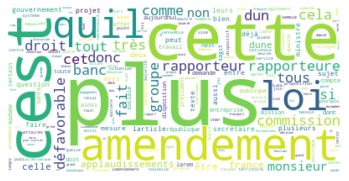

In [161]:
# Pour les novices

wc = make_wordcloud(corpus_novice)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

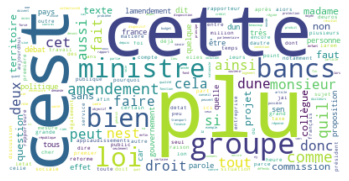

In [160]:
# Pour les non-novices

wc = make_wordcloud(corpus_exp)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Classements des mots les plus cités (histogrammes)

In [164]:
train = df[['Groupe', 'tokenized_replique']]

In [166]:
count_words = pd.DataFrame({'counter' : train
    .groupby('Groupe')
    .apply(lambda s: ' '.join(s['tokenized_replique']).split())
    .apply(lambda s: Counter(s))
    .apply(lambda s: s.most_common(25))
    .explode()}
)
count_words[['word','count']] = pd.DataFrame(count_words['counter'].tolist(), index=count_words.index)
count_words = count_words.reset_index()
print(*count_words["word"])
print(*count_words["count"])

TypeError: sequence item 0: expected str instance, list found